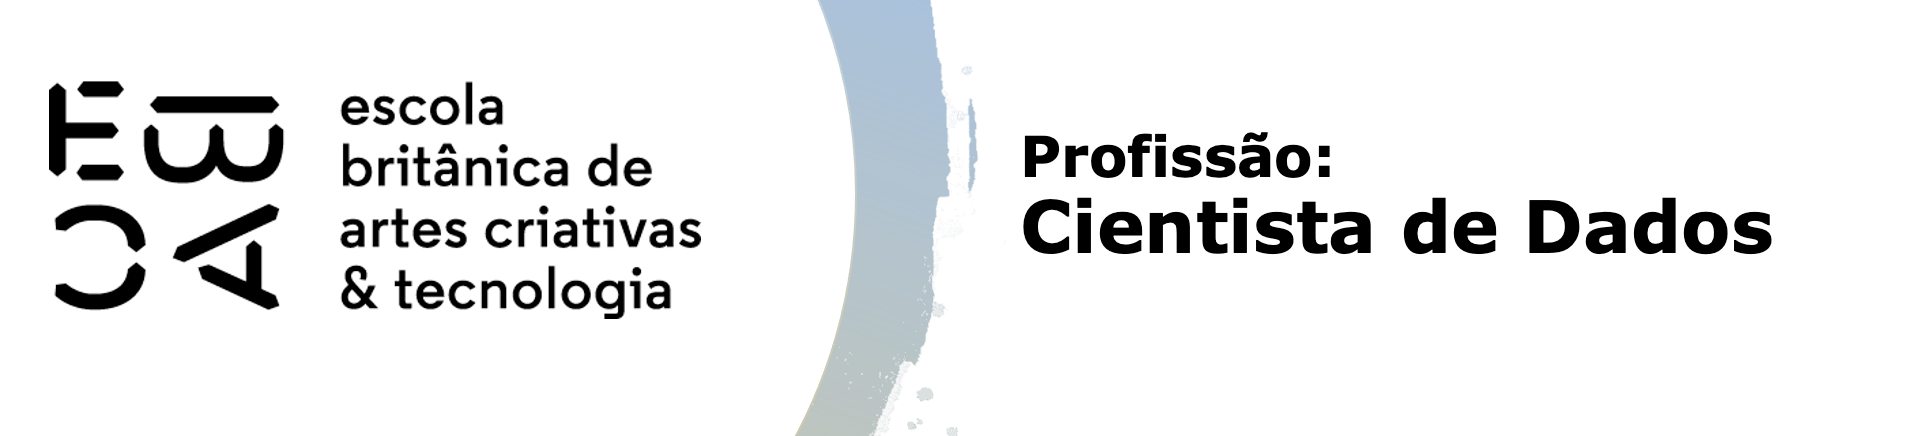

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

%reload_ext watermark
%watermark -iv -v

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

scipy     : 1.11.1
numpy     : 1.24.3
matplotlib: 3.8.1
pandas    : 2.1.3



## Algoritmo

Vamos brincar com o Python com um conjunto de dados bem simples de modo que seja rapidamente compreensível de forma visual, então vamos rodar uma vez 'na mão' o algoritmo do *k-means* para entendermos melhor o que está acontecendo.

Para rodar o algoritmo precisamos:

- Definir *k* o número de grupos que vamos querer no final
- Definir um 'chute' inicial para um centróide de cada grupo
- Ter uma definição de distância, a mais comum e que vamos trabalhar é a distância euclidiana

O algoritmo:

1. Defir os *k* centroides
2. Calcular a distância de cada um dos N ponto a cada um dos *k* centroides
3. classificar cada um dos N pontos a cada um dos *k* centroides conforme a proximidade 
4. Redefinir cada um dos *k* centroides como a média dos pontos mais próximos (conforme 3.)
5. Repetir 2, 3 e 4 até que os centroides não se alterem mais.

## Os nossos dados

Abaixo vamos gerar os dados para os quais vamos aplicar o algoritmo descrito. Será um conjunto bem simples, com um agrupamento identificável visualmente.

In [2]:
# Gerar os dados
np.random.seed(2360873)
x = np.random.normal([1, 2, 3]*4,.2,12)
y = np.random.normal([0, 2, 0]*4,.2,12)
pontos = pd.DataFrame(np.c_[x,y], columns = ['x', 'y'])

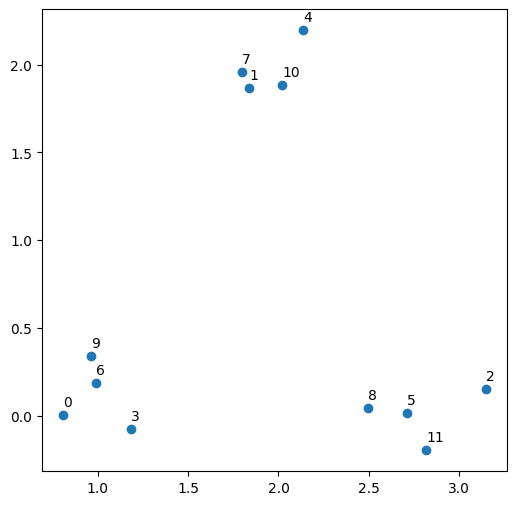

In [3]:
# Fazer o gráfico
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(pontos['x'], pontos['y'])

for idx, col in pontos.iterrows():
     ax.annotate(idx, (col['x'], col['y']+.05) )

## Gerar os *k* centróides

Vamos fazer uma definição inicial dos *k* centroides 'arbitrária'. Não se preocupe com este passo na prática, pois os algoritmos possuem métodos para gerar estes centroides para nós. Neste exercício vamos fazer uma definição para poder acompanhar a execução do algoritmo de forma visual.

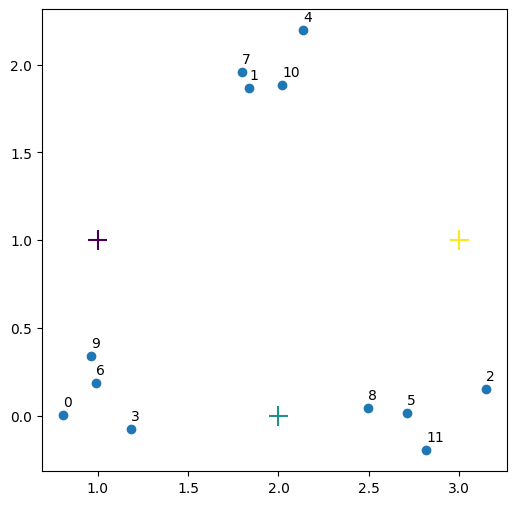

In [4]:
# Gerar os dados
np.random.seed(2360873)

# Centroides iniciais
centroides = pd.DataFrame(np.array([[1, 1], [2, 0], [3, 1]]), columns = ['x', 'y'])

# Fazer o gráfico dos PONTOS
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(pontos['x'], pontos['y'])

# Identificar centroides no gráfico
ax.scatter(centroides.x, centroides.y, c=[1, 2, 3], marker='+', s=200, cmap='viridis')

for idx, col in pontos.iterrows():
     ax.annotate(idx, (col['x'], col['y']+.05) )

## Classificar os pontos aos centroides mais próximos

Neste passo vamos classificar cada ponto como pertencente a um grupo conforme a distância aos centroides. O ponto pertencerá ao centróide que estiver mais próximo. Fazendo isso, vamos plotar novamente para acompanhar a execução.

In [5]:
# Calcula a distância entre os pontos e os centroides
dists = distance.cdist(pontos, centroides, 'euclidean')

# Classifica o ponto no grupo com menor distância ao respectivo centróide
grupo = dists.argmin(1)

grupo

array([0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1], dtype=int64)

Agora vamos plotar para acompanhar a execução.

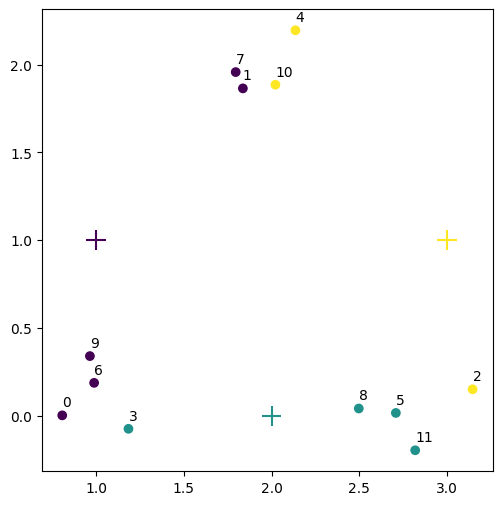

In [6]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(pontos['x'], pontos['y'], c=grupo)
ax.set_aspect('equal', 'box')

ax.scatter(centroides.x, centroides.y, c=[1, 2, 3], marker='+', s=200, cmap='viridis')

for idx, col in pontos.iterrows():
     ax.annotate(idx, (col['x'], col['y']+.05) )

## Atualizar os centróides

Os centróides vão ser alterados de posição para ocupar a coordenada correspondente à média em cada eixo das coordenadas dos pontos classificados nesse centróide. Isso pode alterar uma nova classificação dos pontos aos novos grupos. Vamos plotar para acompanhar.

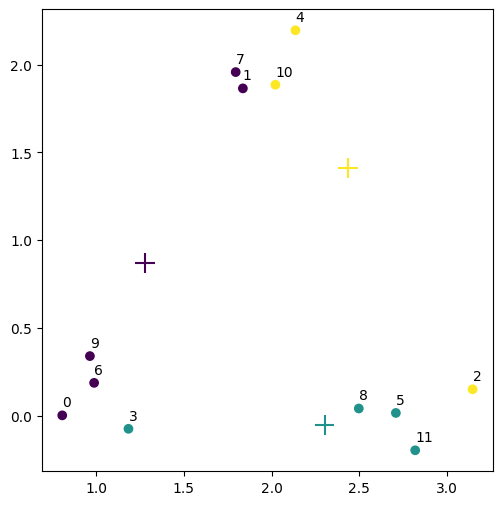

In [7]:
# atualizar centróides
centroides = pontos.groupby(grupo).mean()

# gráfico
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(pontos['x'], pontos['y'], c=grupo)
ax.set_aspect('equal', 'box')

ax.scatter(centroides.x, centroides.y, c=[1, 2, 3], marker='+', s=200, cmap='viridis')

for idx, col in pontos.iterrows():
     ax.annotate(idx, (col['x'], col['y']+.05) )

## Atualizar novamente a classificação dos pontos

Ao 'andar' com os centróides, as classificações dos pontos se alteram. Vamos reclassificar todos os pontos e plotar para acompanhar.

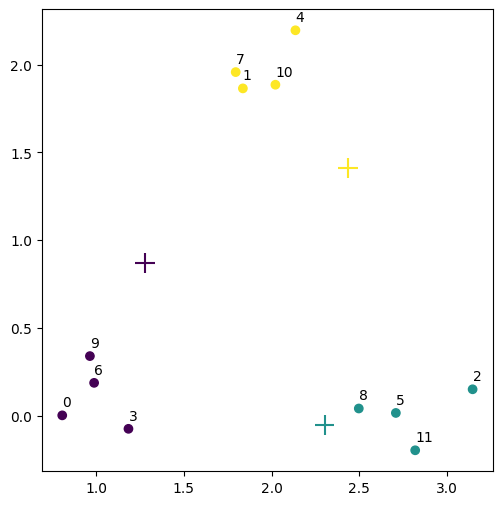

In [10]:
# calcular distancias
dists = distance.cdist(pontos, centroides, 'euclidean')

# atualizar o grupo
grupo = dists.argmin(1)

# gráfico
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(pontos['x'], pontos['y'], c=grupo)
ax.set_aspect('equal', 'box')

ax.scatter(centroides.x, centroides.y, c=[1, 2, 3], marker='+', s=200, cmap='viridis')

for idx, col in pontos.iterrows():
     ax.annotate(idx, (col['x'], col['y']+.05) )

## Atualizar novamente os centróides

Vamos atualizar os centróides novamente. Veja que agora a classificação de mais nenhum ponto se altera, portanto os centróides também permanecerão os mesmos. O algoritmo encerra neste passo.

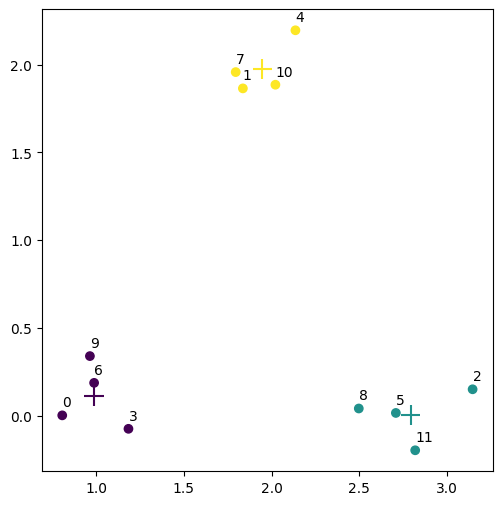

In [11]:
# atualizar centróides
centroides = pontos.groupby(grupo).mean()

# gráfico
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(pontos['x'], pontos['y'], c=grupo)
ax.set_aspect('equal', 'box')

ax.scatter(centroides.x, centroides.y, c=[1, 2, 3], marker='+', s=200, cmap='viridis')

for idx, col in pontos.iterrows():
     ax.annotate(idx, (col['x'], col['y']+.05) )